In [1]:
import os
import platform
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import scipy as sp
from scipy import stats
import statsmodels.api as sm

In [2]:
os.getcwd()

'/Users/youngseoklee/Desktop/workplace/dacon_energy'

In [3]:
#파일경로 설정
if 'macOS' in platform.platform():
    path = '/Users/youngseoklee/Desktop/workplace/datas/dacon_energy/'
    print(path)
elif 'Linux' in platform.platform():
    path = '/workplace/datas/dacon_energy/'
    print(path)
else:
    print('어느 os에도 속해있지 않습니다')

/Users/youngseoklee/Desktop/workplace/datas/dacon_energy/


In [12]:
train_df = pd.read_csv(path + 'train_df.csv', index_col=0)
test_df = pd.read_csv(path + 'test_df.csv', index_col=0)

sub = pd.read_csv(path + 'sample_submission.csv', index_col=0)

In [13]:
train_df.shape , test_df.shape, sub.shape

((204000, 29), (16800, 28), (16800, 1))

In [6]:
train_df.keys()

Index(['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '전력소비량(kWh)', 'Year',
       'Month', 'Day', 'Hour', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)',
       'ESS저장용량(kWh)', 'PCS용량(kW)', '건물유형_건물기타', '건물유형_공공', '건물유형_대학교',
       '건물유형_데이터센터', '건물유형_백화점및아울렛', '건물유형_병원', '건물유형_상용', '건물유형_아파트',
       '건물유형_연구소', '건물유형_지식산업센터', '건물유형_할인마트', '건물유형_호텔및리조트'],
      dtype='object')

In [7]:
train_df.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),Year,Month,Day,Hour,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,1,18.6,0.0,0.9,42.0,1085.28,2022,6,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,18.0,0.0,1.1,45.0,1047.36,2022,6,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,17.7,0.0,1.5,45.0,974.88,2022,6,1,2,...,0,0,0,0,0,0,0,0,0,0
3,1,16.7,0.0,1.4,48.0,953.76,2022,6,1,3,...,0,0,0,0,0,0,0,0,0,0
4,1,18.4,0.0,2.8,43.0,986.40,2022,6,1,4,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.isnull().sum()

건물번호            0
기온(C)           0
강수량(mm)         0
풍속(m/s)         0
습도(%)           0
전력소비량(kWh)      0
Year            0
Month           0
Day             0
Hour            0
연면적(m2)         0
냉방면적(m2)        0
태양광용량(kW)       0
ESS저장용량(kWh)    0
PCS용량(kW)       0
건물유형_건물기타       0
건물유형_공공         0
건물유형_대학교        0
건물유형_데이터센터      0
건물유형_백화점및아울렛    0
건물유형_병원         0
건물유형_상용         0
건물유형_아파트        0
건물유형_연구소        0
건물유형_지식산업센터     0
건물유형_할인마트       0
건물유형_호텔및리조트     0
dtype: int64

In [22]:
train_df['연면적(m2)'].value_counts()

110634.00    2040
240551.00    2040
253743.00    2040
109894.22    2040
31503.00     2040
             ... 
201781.00    2040
155785.00    2040
199623.00    2040
249494.00    2040
57497.84     2040
Name: 연면적(m2), Length: 100, dtype: int64

In [10]:
train_df.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),Year,Month,Day,Hour,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
count,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.0,204000.000000,204000.000000,204000.000000,...,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000,204000.000000
mean,50.500000,25.543524,0.439489,2.134052,78.716518,2451.036462,2022.0,6.929412,14.835294,11.500000,...,0.080000,0.050000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000,0.080000
std,28.866141,3.779523,2.539497,1.358146,15.080496,2440.648858,0.0,0.793923,8.446178,6.922204,...,0.271294,0.217945,0.271294,0.271294,0.271294,0.271294,0.271294,0.271294,0.271294,0.271294
min,1.000000,10.100000,0.000000,0.000000,13.000000,0.000000,2022.0,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,23.400000,0.000000,1.200000,69.000000,1085.760000,2022.0,6.000000,8.000000,5.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,25.700000,0.000000,2.000000,81.000000,1766.400000,2022.0,7.000000,15.000000,11.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,28.100000,0.000000,2.800000,91.000000,2970.000000,2022.0,8.000000,22.000000,17.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,37.100000,92.200000,13.300000,100.000000,25488.400000,2022.0,8.000000,31.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


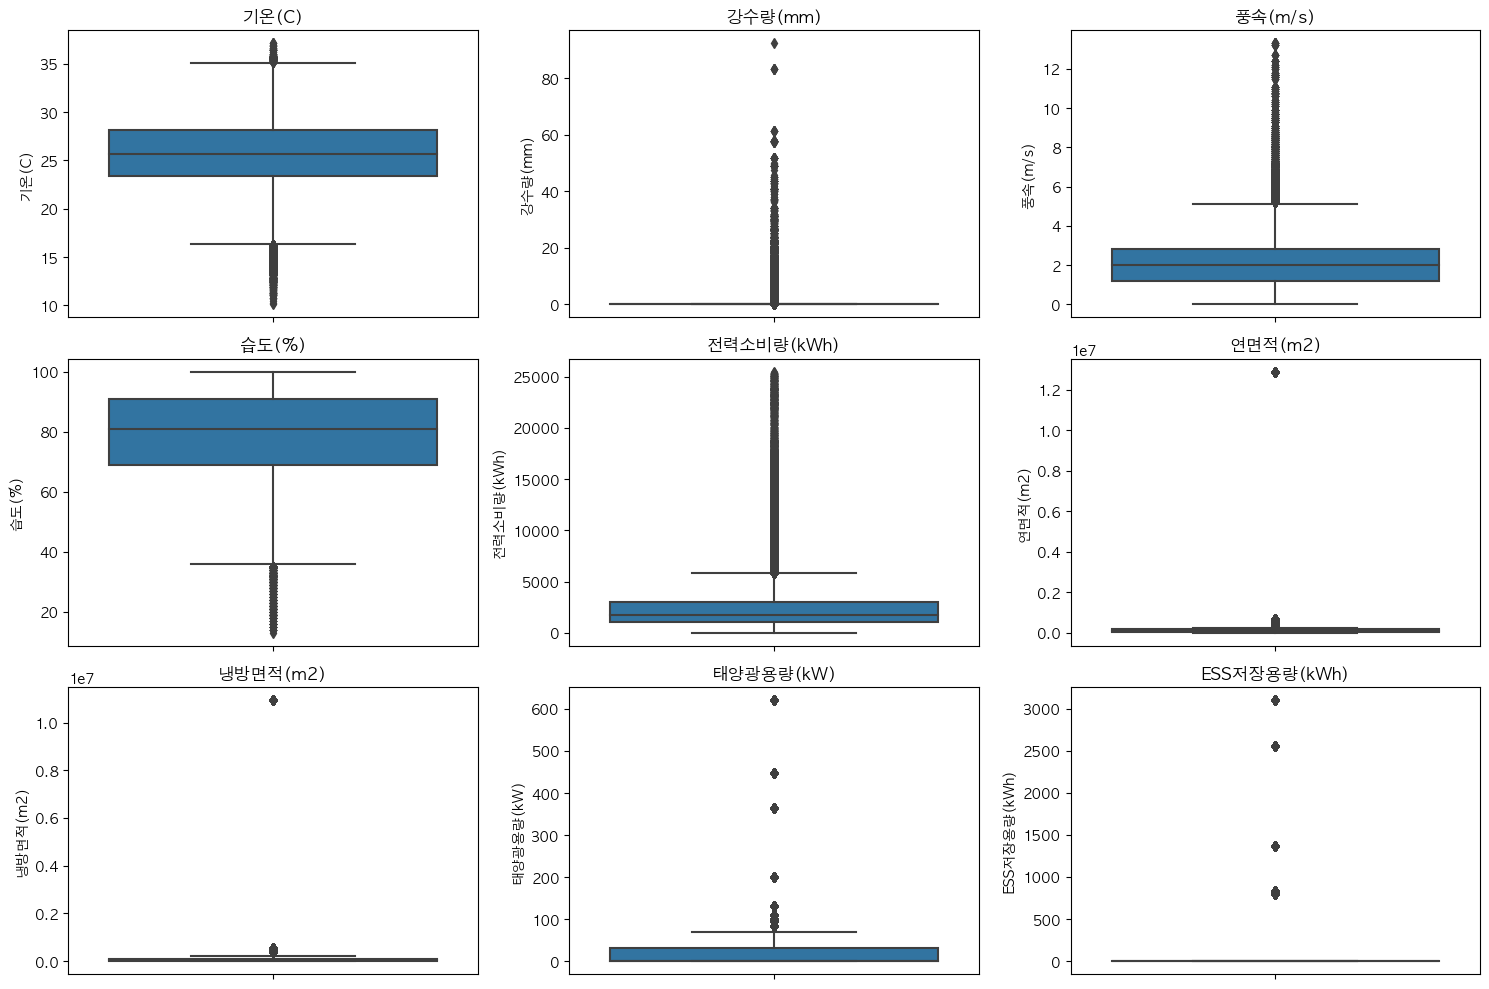

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# List of columns to check for outliers
columns_to_check = ['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '전력소비량(kWh)', '연면적(m2)','냉방면적(m2)','태양광용량(kW)','ESS저장용량(kWh)']

plt.figure(figsize=(15, 10))

# Plotting boxplots for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


/var/folders/qb/s5vw4nk95r53s007_f3ty08m0000gn/T/ipykernel_97848/523184865.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr() ,annot=True)


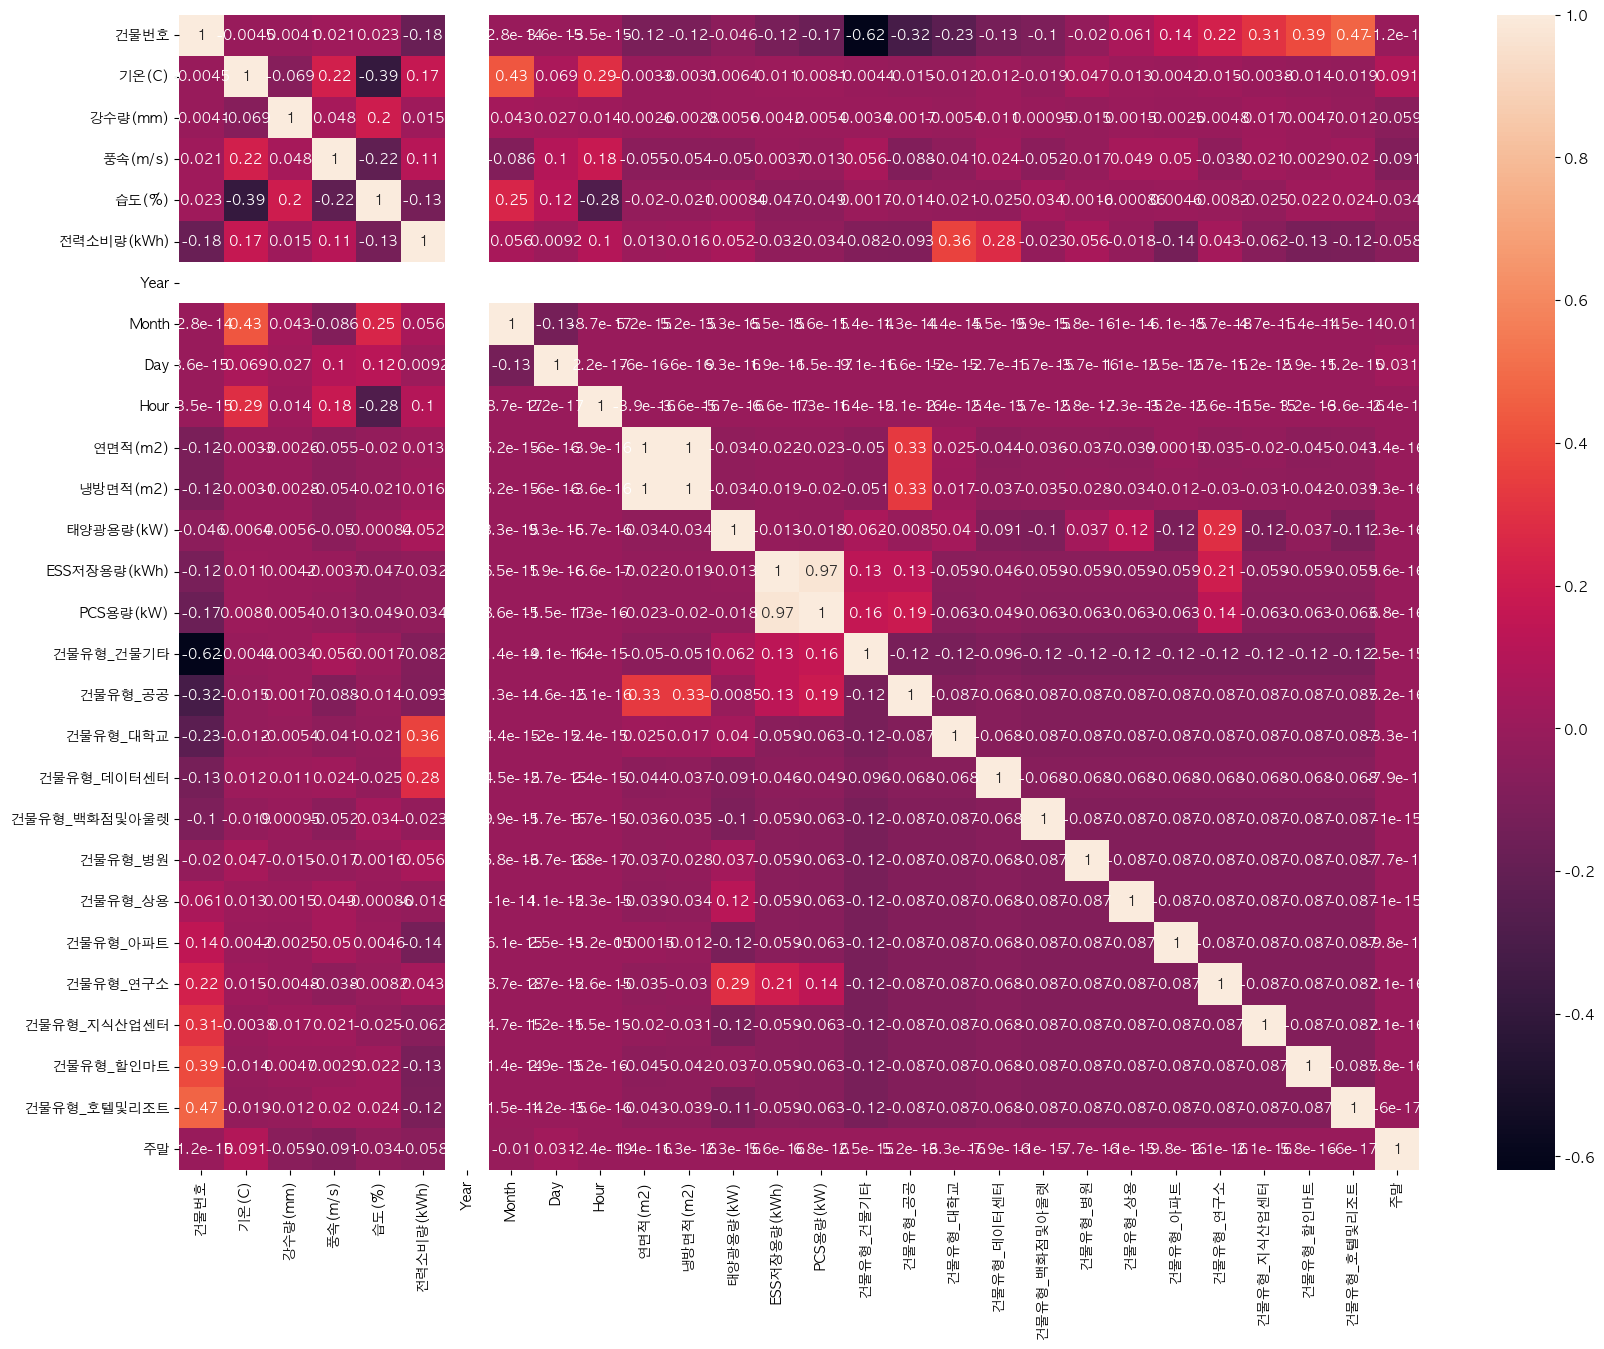

In [39]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_df.corr() ,annot=True)
plt.show()

In [29]:
# Combining the 'Year', 'Month', 'Day', and 'Hour' columns to create a datetime column
train_df['Datetime'] = pd.to_datetime(train_df[['Year', 'Month', 'Day']])

# Setting the 'Datetime' column as the index
train_df.set_index('Datetime', inplace=True)




# Combining the 'Year', 'Month', 'Day', and 'Hour' columns to create a datetime column
test_df['Datetime'] = pd.to_datetime(test_df[['Year', 'Month', 'Day']])

# Setting the 'Datetime' column as the index
test_df.set_index('Datetime', inplace=True)

In [30]:
# Adding a new column for the day of the week
train_df['요일'] = train_df.index.dayofweek

# Mapping the day of the week to the actual day name
day_name_map = {
    0: '월요일',
    1: '화요일',
    2: '수요일',
    3: '목요일',
    4: '금요일',
    5: '토요일',
    6: '일요일'
}
train_df['요일'] = train_df['요일'].map(day_name_map)

# Display the first few rows of the modified dataframe
train_df.head()



# Adding a new column for the day of the week
test_df['요일'] = test_df.index.dayofweek

# Mapping the day of the week to the actual day name
day_name_map = {
    0: '월요일',
    1: '화요일',
    2: '수요일',
    3: '목요일',
    4: '금요일',
    5: '토요일',
    6: '일요일'
}
test_df['요일'] = test_df['요일'].map(day_name_map)

# Display the first few rows of the modified dataframe
test_df.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),Year,Month,Day,Hour,연면적(m2),...,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트,요일
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-08-25,1,23.5,0.0,2.2,72,2022,8,25,0,110634.0,...,0,0,0,0,0,0,0,0,0,목요일
2022-08-25,1,23.0,0.0,0.9,72,2022,8,25,1,110634.0,...,0,0,0,0,0,0,0,0,0,목요일
2022-08-25,1,22.7,0.0,1.5,75,2022,8,25,2,110634.0,...,0,0,0,0,0,0,0,0,0,목요일
2022-08-25,1,22.1,0.0,1.3,78,2022,8,25,3,110634.0,...,0,0,0,0,0,0,0,0,0,목요일
2022-08-25,1,21.8,0.0,1.0,77,2022,8,25,4,110634.0,...,0,0,0,0,0,0,0,0,0,목요일


In [31]:
# Creating a new column where '토요일' and '일요일' are mapped to 1 and other days to 0
train_df['주말'] = train_df['요일'].apply(lambda x: 1 if x in ['토요일', '일요일'] else 0)

# Display the first few rows of the modified dataframe
train_df[['요일', '주말']].head()

# Creating a new column where '토요일' and '일요일' are mapped to 1 and other days to 0
test_df['주말'] = test_df['요일'].apply(lambda x: 1 if x in ['토요일', '일요일'] else 0)

# Display the first few rows of the modified dataframe
test_df[['요일', '주말']].head()

,요일,주말
Datetime,,
2022-08-25,목요일,0
2022-08-25,목요일,0
2022-08-25,목요일,0
2022-08-25,목요일,0
2022-08-25,목요일,0


In [32]:
train_df.shape, test_df.shape

((204000, 29), (16800, 28))

In [33]:
train_df.to_csv(path + 'train_df.csv')
test_df.to_csv(path + 'test_df.csv')

In [5]:
df = pd.read_csv(path + '변수통합(건물특성제외).csv', index_col=0)

In [35]:
train_data = df[df['date_time'] < '2022-08-25']

test_data = df[df['date_time'] >= '2022-08-25']

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187200 entries, 168 to 203999
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   num_date_time   187200 non-null  object 
 1   num             187200 non-null  int64  
 2   date_time       187200 non-null  object 
 3   temp            187200 non-null  float64
 4   rain            187200 non-null  float64
 5   wind            187200 non-null  float64
 6   hum             187200 non-null  float64
 7   sun             187200 non-null  float64
 8   solar           187200 non-null  float64
 9   year            187200 non-null  int64  
 10  month           187200 non-null  int64  
 11  day             187200 non-null  int64  
 12  week            187200 non-null  int64  
 13  hour            187200 non-null  int64  
 14  holi            187200 non-null  int64  
 15  day_hour_mean   187200 non-null  float64
 16  hour_mean       187200 non-null  float64
 17  hour_std

In [38]:
train_data.drop(['sun', 'solar'], axis=1, inplace=True)
test_data.drop(['sun', 'solar'], axis=1, inplace=True)

train_data.drop(['num_date_time', 'date_time'], axis=1, inplace=True)
test_data.drop(['num_date_time', 'date_time'], axis=1, inplace=True)

/var/folders/qb/s5vw4nk95r53s007_f3ty08m0000gn/T/ipykernel_44768/1920130141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['sun', 'solar'], axis=1, inplace=True)
/var/folders/qb/s5vw4nk95r53s007_f3ty08m0000gn/T/ipykernel_44768/1920130141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['sun', 'solar'], axis=1, inplace=True)


In [44]:
train_data.shape, test_data.shape

((187200, 23), (16800, 23))

In [45]:
train_data.to_csv(path + 'train_data.csv')
test_data.to_csv(path + 'test_data.csv')